In [24]:
import matplotlib.pyplot as plt
import cv2
import re

alphabet="1234567890ABCDEFGHIJKLMNOPQRSTUVWSYZ-. *"
bars=["WNNNW","NWNNW","WWNNN","NNWNW","WNWNN","NWWNN","NNNWW","WNNWN","NWNWN","NNWWN"]
spaces=[2,3,4,1]
codeyjRule1=r".*010$"
codeyjRule2=r".*0110$"
codeyjRule3=r"^110.*"


def encode39(char):
    i=alphabet.find(char)
    encodedchar=""
    tspace=0
    for bar in bars[i%10]:
        if bar=='W':
            encodedchar=encodedchar+'11'
        elif bar=='N':
            encodedchar=encodedchar+'1'
        tspace+=1
        if tspace==spaces[int(i/10)]:
            encodedchar=encodedchar+'00'
        else:
            encodedchar=encodedchar+'0'
    return encodedchar

def code39encode(string):
    uncodedstr='*'+string+'*'
    encodedstr=''
    for c in uncodedstr:
        encodedstr=encodedstr+encode39(c)

    return encodedstr

def code2img(code,codewidth=2,imgheight=50):
    imgrow=[]
    for c in code:
        if c=='1':
            for i in range(codewidth):
                imgrow.append(0)
        elif c=='0':
            for i in range(codewidth):
                imgrow.append(255)
    
    bimg=[]
    for i in range(imgheight):
        bimg.append(imgrow)

    return bimg

def codeyjencode(string):
    uncodedstr=string
    encodedstrList=[]
    for c in uncodedstr:
        if re.match(codeyjRule1,encode39(c))==None:
            encodedstrList.append(encode39(c))
        else:
            encodedstrList.append(encode39(c)[:-2])
    if not len(encodedstrList)==1:
        for i in range(len(encodedstrList)-1):
            if not re.match(codeyjRule2,encodedstrList[i])==None:
                if not re.match(codeyjRule3,encodedstrList[i+1])==None:
                    encodedstrList[i]=encodedstrList[i][:-1]
    encodedstrList.append('1')
    return "".join(encodedstrList)



In [22]:
ostr="W"
img=code2img(codeyjencode(ostr))
codeyjencode(ostr)

'110011010101'

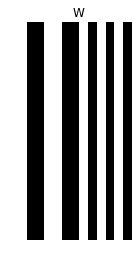

(<matplotlib.image.AxesImage at 0x13168ffae10>,
 (-0.5, 23.5, 49.5, -0.5),
 Text(0.5, 1.0, 'W'),
 None)

In [23]:
plt.imshow(img,cmap='gray'),plt.axis('off'),plt.title(ostr),plt.show()

In [25]:
for a in alphabet:
    print(encode39(a))

1101001010110
1011001010110
1101100101010
1010011010110
1101001101010
1011001101010
1010010110110
1101001011010
1011001011010
1010011011010
1101010010110
1011010010110
1101101001010
1010110010110
1101011001010
1011011001010
1010100110110
1101010011010
1011010011010
1010110011010
1101010100110
1011010100110
1101101010010
1010110100110
1101011010010
1011011010010
1010101100110
1101010110010
1011010110010
1010110110010
1100101010110
1001101010110
1100110101010
1011010110010
1100101101010
1001101101010
1001010110110
1100101011010
1001101011010
1001011011010
